side quest script: H3 triangular

In [2]:
from pyscf import gto, scf, mcscf, fci
import numpy as np
import matplotlib.pyplot as plt
from pyblock2._pyscf.ao2mo import integrals as itg
from pyblock2.driver.core import DMRGDriver, SymmetryTypes
import os 
from pyscf.tools import molden

UHf reference calculation

In [ ]:
H3tri = gto.M(atom=[["H", 0, 0, 0],
                    ["H", 0.87, 0, 0], 
                    ["H", 0.435, 0.7534421013, 0]], basis = 'sto3-g', charge = 0, spin = 1)
uhf3=scf.UHF(H3tri)
uhf3.kernel()

H3tri_alpha_coeff=uhf3.mo_coeff[0]
H3tri_beta_coeff=uhf3.mo_coeff[1]
H3tri_alpha_en=uhf3.mo_energy[0]
H3tri_beta_en=uhf3.mo_energy[1]
H3tri_alpha_occ=uhf3.mo_occ[0]
H3tri_beta_occ=uhf3.mo_occ[1]
print('Number of alpha coefficients:', len(H3tri_alpha_coeff))
print('Alpha orbital energies: ', H3tri_alpha_en)
print('Number of beta coefficients:', len(H3tri_beta_coeff))
print('Beta orbital energies: ', H3tri_beta_en)
print('Alpha coeffs: ', H3tri_alpha_coeff)
print('Beta coeffs: ', H3tri_beta_coeff)



converged SCF energy = -1.26655985720275  <S^2> = 0.75  2S+1 = 2
Number of alpha coefficients: 3
Alpha orbital energies:  [-0.77216933 -0.03705914  0.45729621]
Number of beta coefficients: 3
Beta orbital energies:  [-0.6366269   0.51088806  0.66418128]
Alpha coeffs:  [[ 3.68084841e-01 -6.42280828e-01 -1.08594265e+00]
 [ 3.68081747e-01 -6.42249420e-01  1.08596228e+00]
 [ 4.43572578e-01  1.23714426e+00 -1.72583224e-05]]
Beta coeffs:  [[ 4.58192647e-01 -1.08594703e+00 -5.81430218e-01]
 [ 4.58202169e-01  1.08595790e+00 -5.81402419e-01]
 [ 2.57559178e-01 -1.76246964e-05  1.28877687e+00]]


In [13]:
np.save('/workspaces/MRA-OrbitalOptimization/coefficients/h3tri_sto3g_coeffs/h3tri_087/H3tri_087_alphacoeffs.npy', H3tri_alpha_coeff)
np.save('/workspaces/MRA-OrbitalOptimization/coefficients/h3tri_sto3g_coeffs/h3tri_087/H3tri_087_betacoeffs.npy', H3tri_beta_coeff)

In [14]:
h3tri_acoeff_npy = np.load('/workspaces/MRA-OrbitalOptimization/coefficients/h3tri_sto3g_coeffs/h3tri_087/H3tri_087_alphacoeffs.npy')
h3tri_bcoeff_npy = np.load('/workspaces/MRA-OrbitalOptimization/coefficients/h3tri_sto3g_coeffs/h3tri_087/H3tri_087_betacoeffs.npy')

print(h3tri_acoeff_npy)
print(h3tri_bcoeff_npy)

[[ 3.68084841e-01 -6.42280828e-01 -1.08594265e+00]
 [ 3.68081747e-01 -6.42249420e-01  1.08596228e+00]
 [ 4.43572578e-01  1.23714426e+00 -1.72583224e-05]]
[[ 4.58192647e-01 -1.08594703e+00 -5.81430218e-01]
 [ 4.58202169e-01  1.08595790e+00 -5.81402419e-01]
 [ 2.57559178e-01 -1.76246964e-05  1.28877687e+00]]


In [ ]:
h3tri_acoeff_npy = np.load('/workspaces/MRA-OrbitalOptimization/coefficients/h3tri_sto3g_coeffs/h3tri_cusp/uhf_h3tri_sto3g_087_alphacoeffs.npy')
h3tri_bcoeff_npy = np.load('/workspaces/MRA-OrbitalOptimization/coefficients/h3tri_sto3g_coeffs/h3tri_cusp/uhf_h3tri_sto3g_087_betacoeffs.npy')

print(h3tri_acoeff_npy)
print(h3tri_bcoeff_npy)

np.save('/workspaces/MRA-OrbitalOptimization/coefficients/h3tri_sto3g_coeffs/h3tri_087/H3tri_087_alphacoeffs.npy', h3tri_acoeff_)

[[ 3.68086802e-01 -6.42300735e-01 -1.08593021e+00]
 [ 3.68079786e-01 -6.42229511e-01  1.08597472e+00]
 [ 4.43572578e-01  1.23714426e+00 -3.91370216e-05]]
[[ 4.58186612e-01 -1.08594014e+00 -5.81447839e-01]
 [ 4.58208203e-01  1.08596479e+00 -5.81384798e-01]
 [ 2.57559178e-01 -3.99678515e-05  1.28877687e+00]]


In [2]:
folder_path = "./tmp"  #change here the directory where the tmp files are located

for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # Check if it's a file (not a directory) and delete it
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Deleted: {file_path}")

Deleted: ./tmp/F.MPS.GS.0
Deleted: ./tmp/F.MPS.GS.1
Deleted: ./tmp/F.MPS.GS.2
Deleted: ./tmp/F.MPS.GS.3
Deleted: ./tmp/F.MPS.GS.4
Deleted: ./tmp/F.MPS.GS.5
Deleted: ./tmp/F.MPS.INFO.GS.LEFT.0
Deleted: ./tmp/F.MPS.INFO.GS.RIGHT.0
Deleted: ./tmp/F.MPS.INFO.GS.LEFT.1
Deleted: ./tmp/F.MPS.INFO.GS.RIGHT.1
Deleted: ./tmp/F.MPS.INFO.GS.LEFT.2
Deleted: ./tmp/F.MPS.INFO.GS.RIGHT.2
Deleted: ./tmp/F.MPS.INFO.GS.LEFT.3
Deleted: ./tmp/F.MPS.INFO.GS.RIGHT.3
Deleted: ./tmp/F.MPS.INFO.GS.LEFT.4
Deleted: ./tmp/F.MPS.INFO.GS.RIGHT.4
Deleted: ./tmp/F.MPS.INFO.GS.LEFT.5
Deleted: ./tmp/F.MPS.INFO.GS.RIGHT.5
Deleted: ./tmp/F.MPS.INFO.GS.LEFT.6
Deleted: ./tmp/F.MPS.INFO.GS.RIGHT.6
Deleted: ./tmp/F.MPS.GS.-1
Deleted: ./tmp/GS-mps_info.bin


DMRG calculation

In [17]:
norbs, nelecas = (3, (2, 1))
ref_ucas = mcscf.UCASSCF(uhf3, norbs, nelecas).mc1step()[0]

bond_dims = [15] * 10
noises = [1e-4] *  5 + [1e-5] * 5 + [0]
thrds = [1e-8] * 10
ncas, n_elec, spin, ecore, h1e, g2e, orb_sym = itg.get_uhf_integrals(uhf3,
    ncore=0, ncas=None, g2e_symm=1)


driver = DMRGDriver(scratch="./tmp", symm_type=SymmetryTypes.SZ, n_threads=4)
driver.initialize_system(n_sites=ncas, n_elec=n_elec, spin=spin, orb_sym=orb_sym)

mpo = driver.get_qc_mpo(h1e=h1e, g2e=g2e, ecore=ecore, iprint=1)
ket = driver.get_random_mps(tag="GS", bond_dim=20, nroots=1)
energy = driver.dmrg(mpo, ket, n_sweeps=20, bond_dims=bond_dims, noises=noises,
    thrds=thrds, iprint=1)
print('DMRG energy = %20.15f' % energy)

UCASSCF energy = -1.29459035437096
UCASCI E = -1.29459035437096  E(CI) = -3.11933935753424  S^2 = 0.7500000
integral symmetrize error =  0.0
integral cutoff error =  0.0
mpo terms =        214

Build MPO | Nsites =     3 | Nterms =        214 | Algorithm = FastBIP | Cutoff = 1.00e-20
 Site =     0 /     3 .. Mmpo =    26 DW = 0.00e+00 NNZ =       26 SPT = 0.0000 Tmvc = 0.000 T = 0.001
 Site =     1 /     3 .. Mmpo =    26 DW = 0.00e+00 NNZ =      115 SPT = 0.8299 Tmvc = 0.000 T = 0.002
 Site =     2 /     3 .. Mmpo =     1 DW = 0.00e+00 NNZ =       26 SPT = 0.0000 Tmvc = 0.000 T = 0.001
Ttotal =      0.004 Tmvc-total = 0.000 MPO bond dimension =    26 MaxDW = 0.00e+00
NNZ =          167 SIZE =          728 SPT = 0.7706



Rank =     0 Ttotal =      0.010 MPO method = FastBipartite bond dimension =      26 NNZ =          167 SIZE =          728 SPT = 0.7706

Sweep =    0 | Direction =  forward | Bond dimension =   15 | Noise =  1.00e-04 | Dav threshold =  1.00e-08
Time elapsed =      0.058 | E =      -1.2945903532 | DW = 0.00000e+00

Sweep =    1 | Direction = backward | Bond dimension =   15 | Noise =  1.00e-04 | Dav threshold =  1.00e-08
Time elapsed =      0.122 | E =      -1.2945903532 | DE = 4.44e-16 | DW = 0.00000e+00

Sweep =    2 | Direction =  forward | Bond dimension =   15 | Noise =  1.00e-04 | Dav threshold =  1.00e-08
Time elapsed =      0.185 | E =      -1.2945903532 | DE = 0.00e+00 | DW = 0.00000e+00

Sweep =    3 | Direction = backward | Bond dimension =   15 | Noise =  1.00e-04 | Dav threshold =  1.00e-08
Time elapsed =      0.280 | E =      -1.2945903532 | DE = -4.44e-16 | DW = 0.00000e+00

Sweep =    4 | Direction =  forward | Bond dimension =   15 | Noise =  1.00e-04 | Dav threshold =

Get the rdms and save them

In [18]:
onerdm = driver.get_1pdm(ket)
twordm = driver.get_2pdm(ket)

alpha_1rdm=onerdm[0]
beta_1rdm=onerdm[1]
aa_2rdm = twordm[0]
ab_2rdm = twordm[1]
bb_2rdm = twordm[2]

np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3tri_sto3g_min/alpha_rdms.npy', alpha_1rdm)
np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3tri_sto3g_min/beta_rdms.npy', beta_1rdm)
np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3tri_sto3g_min/alpha_alpha_rdms.npy', aa_2rdm)
np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3tri_sto3g_min/alpha_beta_rdms.npy', ab_2rdm)
np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3tri_sto3g_min/beta_beta_rdms.npy', bb_2rdm)

In [15]:
alpha_int = h1e[0]
beta_int = h1e[1]

print(alpha_int)
print(beta_int)

[[-1.83704448e+00  3.08517071e-02 -1.54037897e-06]
 [ 3.08517071e-02 -1.07018807e+00  6.18716214e-08]
 [-1.54037897e-06  6.18716212e-08 -1.06894886e+00]]
[[-1.82952982e+00  4.37857930e-06 -8.15967122e-02]
 [ 4.37857930e-06 -1.06894886e+00  4.69743128e-07]
 [-8.15967122e-02  4.69743128e-07 -1.07770273e+00]]


FCI reference with cc-pvtz

In [2]:
H3tri = gto.M(atom=[["H", 0, 0, 0],
                    ["H", 0.87, 0, 0], 
                    ["H", 0.435, 0.7534421013, 0]], basis = 'cc-pvtz', charge = 0, spin = 1)
uhf3=scf.UHF(H3tri)
uhf3.kernel()

fcisolver = fci.FCI(uhf3)
fcisolver.kernel()

converged SCF energy = -1.49984514969688  <S^2> = 0.75367952  2S+1 = 2.0036761


(-1.5543634278441494,
 FCIvector([[ 9.87434927e-01, -4.51730338e-06,  1.31297479e-04, ...,
             -3.78655520e-10, -1.16902961e-05, -6.69751446e-10],
            [ 1.15409240e-05,  2.81664390e-02,  1.70405371e-05, ...,
              5.07720282e-04,  3.01623375e-07, -6.51138593e-05],
            [-7.86496200e-06,  4.09972151e-02, -4.36609739e-07, ...,
              1.26058820e-03, -1.50343629e-09, -8.09380170e-05],
            ...,
            [ 8.93571772e-09,  2.01279392e-05,  4.45373580e-11, ...,
             -1.06269048e-06,  3.27505469e-12, -4.63510686e-07],
            [-1.50301793e-04,  1.21108062e-08, -1.69321690e-05, ...,
              1.21636106e-09, -2.23550055e-06,  9.18798310e-11],
            [ 3.11373173e-09, -1.40204782e-05, -8.55412900e-09, ...,
             -2.05612137e-06, -1.54355627e-09,  3.75062425e-06]]))

Plot the energies of spinorbopt code

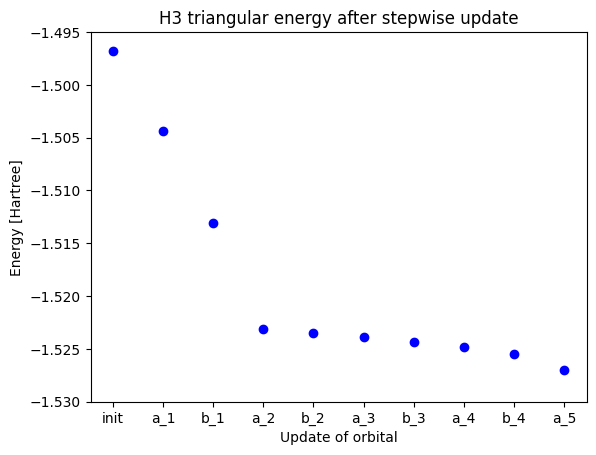

In [4]:
#plot energies of H3 spin optimizer

x1 = np.arange(0, 11, 1)
x2 = np.arange(1, 11, 1)
x3 = np.arange(0, 10, 1)
FCI_H3 = np.full(11, -1.5543634278441494)
H3_energies = [-1.294552, -1.426744, -1.452930, -1.472178, -1.483864, -1.491432, 
               -1.496565, -1.500127, -1.502814, -1.504889, -1.506460]
highest_error = [6.509043e-01, 2.708442e-01, 1.879190e-01, 1.360625e-01, 1.469342e-01,
                 1.605590e-01, 1.729665e-01, 1.827791e-01, 1.898751e-01, 1.945542e-01]
H3_energies_stepwise_631g_crap = [-1.496836, -1.452134, -1.440259, -1.381249, -1.381436, -1.382395, -1.383508, -1.384719, -1.385474, -1.386265]
energy_stepwise_631g = [-1.496836, -1.504381, -1.513061, -1.523131, -1.523519, -1.523923, -1.524372, -1.524835, -1.525453, -1.527036]



#fig, ax1 = plt.subplots()
fig, ax = plt.subplots()
ax.scatter(x3, energy_stepwise_631g, color='blue')
#ax1.plot(x1, FCI_H3, color='black', label='FCI (cc-pVTZ)')
#ax1.scatter(x1, H3_energies, color='black', label='energy after all orbital update')
#ax1.legend(loc='upper right', fontsize='small')

ax.set_xlabel('Update of orbital')
ax.set_ylabel('Energy [Hartree]')

#ax2 = ax1.twinx()
#ax2.scatter(x2, highest_error, color='red', label='highest error')
#ax2.set_ylabel('Energy [Hartree]')
#ax2.legend(loc='upper right', fontsize='small')

#lines_1, labels_1 = ax1.get_legend_handles_labels()
#lines_2, labels_2 = ax2.get_legend_handles_labels()
#ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', fontsize='small')


ax.set_title('H3 triangular energy after stepwise update')
#ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.4f}'))
#ax.set_xticks(np.arange(0.0, 4.5, 0.5))
ax.set_xticks(np.arange(0, 10, 1))
ax.set_xticklabels(['init', 'a_1', 'b_1', 'a_2', 'b_2', 'a_3', 'b_3', 'a_4', 'b_4', 'a_5'])

ax.set_yticks(np.arange(-1.495, -1.535, -0.005))
#ax2.set_yticks(np.arange(0.1, 0.75, 0.1))

#plt.tight_layout()
plt.show()

UHF calculation for the same geometry, but with 6-31g basis set

In [3]:
H3tri_631g = gto.M(atom=[["H", 0, 0, 0],
                    ["H", 0.87, 0, 0], 
                    ["H", 0.435, 0.7534421013, 0]], basis = '6-31g', charge = 0, spin = 1)
uhf_631g=scf.UHF(H3tri_631g)
uhf_631g.kernel()

H3tri_alpha_coeff_631g=uhf_631g.mo_coeff[0]
H3tri_beta_coeff_631g=uhf_631g.mo_coeff[1]
H3tri_alpha_en_631g=uhf_631g.mo_energy[0]
H3tri_beta_en_631g=uhf_631g.mo_energy[1]
H3tri_alpha_occ_631g=uhf_631g.mo_occ[0]
H3tri_beta_occ_631g=uhf_631g.mo_occ[1]
print('Number of alpha coefficients:', len(H3tri_alpha_coeff_631g))
print('Alpha orbital energies: ', H3tri_alpha_en_631g)
print('Number of beta coefficients:', len(H3tri_beta_coeff_631g))
print('Beta orbital energies: ', H3tri_beta_en_631g)
print('Alpha coeffs: ', H3tri_alpha_coeff_631g)
print('Beta coeffs: ', H3tri_beta_coeff_631g)

converged SCF energy = -1.46528649739976  <S^2> = 0.75105639  2S+1 = 2.0010561
Number of alpha coefficients: 6
Alpha orbital energies:  [-0.8455631  -0.20028017  0.13476134  0.64734228  1.12004721  1.14853274]
Number of beta coefficients: 6
Beta orbital energies:  [-0.76223223  0.16087052  0.22475938  0.67919545  1.16007984  1.23423861]
Alpha coeffs:  [[ 2.81093668e-01 -1.54577467e-01  1.89783836e-01  6.21474167e-01
   5.75086363e-01 -1.02954496e+00]
 [ 1.37265960e-01 -7.48350578e-01  1.38060271e+00 -5.38902814e-01
  -8.03503130e-01  1.32446995e+00]
 [ 2.81094030e-01 -1.54579829e-01 -1.89782760e-01  6.21473906e-01
   5.75097683e-01  1.02953854e+00]
 [ 1.37266407e-01 -7.48362114e-01 -1.38059532e+00 -5.38902753e-01
  -8.03518718e-01 -1.32446166e+00]
 [ 3.05334845e-01  2.91468813e-01 -8.97997367e-07  5.83794221e-01
  -1.18188151e+00  6.68662386e-06]
 [ 1.68025640e-01  1.48506239e+00 -7.09011769e-06 -4.89418955e-01
   1.64378062e+00 -8.73236182e-06]]
Beta coeffs:  [[ 3.18153403e-01  1.8636

In [1]:
#np.save('/workspaces/MRA-OrbitalOptimization/coefficients/h3tri_631g_coeffs/h3tri_cusp/087_alphacoeffs.npy', H3tri_alpha_coeff_631g)
#np.save('/workspaces/MRA-OrbitalOptimization/coefficients/h3tri_631g_coeffs/h3tri_cusp/087_betacoeffs.npy', H3tri_beta_coeff_631g)

diff_lesszeroes = -1.496905939562363 + 1.496836
print(diff_lesszeroes)

-6.993956236289733e-05


DMRG based on UHf-631g orbitals

In [3]:
H3tri_631g = gto.M(atom=[["H", 0, 0, 0],
                    ["H", 0.87, 0, 0], 
                    ["H", 0.435, 0.7534421013, 0]], basis = '6-31g', charge = 0, spin = 1)
uhf_631g=scf.UHF(H3tri_631g)
uhf_631g.kernel()

norbs, nelecas = (6, (2, 1))
ref_ucas = mcscf.UCASSCF(uhf_631g, norbs, nelecas).mc1step()[0]

bond_dims = [250] * 20
noises = [1e-4] *  10 + [1e-5] * 10 + [0]
thrds = [1e-8] * 20
ncas, n_elec, spin, ecore, h1e, g2e, orb_sym = itg.get_uhf_integrals(uhf_631g,
    ncore=0, ncas=None, g2e_symm=1)


driver_631g = DMRGDriver(scratch="./tmp", symm_type=SymmetryTypes.SZ, n_threads=4)
driver_631g.initialize_system(n_sites=ncas, n_elec=n_elec, spin=spin, orb_sym=orb_sym)

mpo_631g = driver_631g.get_qc_mpo(h1e=h1e, g2e=g2e, ecore=ecore, iprint=1)
ket_631g = driver_631g.get_random_mps(tag="GS", bond_dim=250, nroots=1)
energy_631g = driver_631g.dmrg(mpo_631g, ket_631g, n_sweeps=24, bond_dims=bond_dims, noises=noises,
    thrds=thrds, iprint=1)
print('DMRG energy = %20.15f' % energy_631g)
print('difference ucasscf dmrg', ref_ucas - energy_631g)

converged SCF energy = -1.46528649740625  <S^2> = 0.75105639  2S+1 = 2.0010561
UCASSCF energy = -1.49690593960115
UCASCI E = -1.49690593960115  E(CI) = -3.32165494276443  S^2 = 0.7500000
integral symmetrize error =  0.0
integral cutoff error =  0.0
mpo terms =       2642

Build MPO | Nsites =     6 | Nterms =       2642 | Algorithm = FastBIP | Cutoff = 1.00e-20
 Site =     0 /     6 .. Mmpo =    30 DW = 0.00e+00 NNZ =       30 SPT = 0.0000 Tmvc = 0.001 T = 0.014
 Site =     1 /     6 .. Mmpo =    66 DW = 0.00e+00 NNZ =      277 SPT = 0.8601 Tmvc = 0.001 T = 0.018
 Site =     2 /     6 .. Mmpo =   110 DW = 0.00e+00 NNZ =      483 SPT = 0.9335 Tmvc = 0.001 T = 0.009
 Site =     3 /     6 .. Mmpo =    66 DW = 0.00e+00 NNZ =     1231 SPT = 0.8304 Tmvc = 0.001 T = 0.007
 Site =     4 /     6 .. Mmpo =    30 DW = 0.00e+00 NNZ =      279 SPT = 0.8591 Tmvc = 0.000 T = 0.004
 Site =     5 /     6 .. Mmpo =     1 DW = 0.00e+00 NNZ =       30 SPT = 0.0000 Tmvc = 0.000 T = 0.002
Ttotal =      0.05

In [5]:
onerdm = driver_631g.get_1pdm(ket_631g)
twordm = driver_631g.get_2pdm(ket_631g)

alpha_1rdm=onerdm[0]
beta_1rdm=onerdm[1]
aa_2rdm = twordm[0]
ab_2rdm = twordm[1]
bb_2rdm = twordm[2]

#np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3tri_631g_min/alpha_rdms.npy', alpha_1rdm)
#np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3tri_631g_min/beta_rdms.npy', beta_1rdm)
#np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3tri_631g_min/alpha_alpha_rdms.npy', aa_2rdm)
#np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3tri_631g_min/alpha_beta_rdms.npy', ab_2rdm)
#np.save('/workspaces/MRA-OrbitalOptimization/reduced_density_matrices/h3tri_631g_min/beta_beta_rdms.npy', bb_2rdm)
print(alpha_1rdm)
print(beta_1rdm)

[[ 9.88330263e-01  5.81205737e-03 -8.75934285e-04  6.57711189e-03
   3.84395829e-03 -5.69331756e-04]
 [ 5.81205737e-03  9.85168831e-01 -7.90721051e-02 -1.56151104e-03
  -5.46183148e-03  5.26161784e-03]
 [-8.75934285e-04 -7.90721051e-02  1.72999495e-02  4.00525399e-05
  -1.62307789e-05 -6.62339411e-03]
 [ 6.57711189e-03 -1.56151104e-03  4.00525399e-05  1.56486103e-03
   1.53988853e-04  3.45168193e-06]
 [ 3.84395829e-03 -5.46183148e-03 -1.62307789e-05  1.53988853e-04
   3.84376507e-03 -7.58069315e-05]
 [-5.69331756e-04  5.26161784e-03 -6.62339411e-03  3.45168193e-06
  -7.58069315e-05  3.79233054e-03]]
[[ 9.80739300e-01 -1.04103312e-02 -5.58752575e-03  3.31873222e-03
   4.42834484e-03  1.46882509e-03]
 [-1.04103312e-02  1.07382849e-02 -2.00571454e-04  8.56512402e-05
  -6.20465286e-03  2.86195346e-06]
 [-5.58752575e-03 -2.00571454e-04  1.51800167e-03  6.28440055e-04
  -6.62211672e-06 -1.21325387e-03]
 [ 3.31873222e-03  8.56512402e-05  6.28440055e-04  1.79118930e-03
  -5.11662663e-05 -4.430

In [10]:
alpha_int = h1e[0]
beta_int = h1e[1]
aa_int = g2e[0]
ab_int = g2e[1]
bb_int = g2e[2]

aa_2rdm_631g = twordm[0].transpose(0, 3, 1, 2)
aa_2rdm_631g = np.swapaxes(aa_2rdm_631g, 1, 2)
ab_2rdm_631g = twordm[1].transpose(0, 3, 1, 2)
ab_2rdm_631g = np.swapaxes(ab_2rdm_631g, 1, 2)
bb_2rdm_631g = twordm[2].transpose(0, 3, 1, 2)
bb_2rdm_631g = np.swapaxes(bb_2rdm_631g, 1, 2)

one_body_en = np.einsum('ij,ij->', alpha_1rdm, alpha_int) + np.einsum('ij,ij->', beta_1rdm, beta_int)
one_body_en_spinorbopt = 1.818398 - 6.566499
two_body_en = 0.5 * (np.einsum('ijkl,ikjl->', aa_2rdm_631g, aa_int) + 2 * np.einsum('ijkl,ikjl->', ab_2rdm_631g, ab_int) + 
                     np.einsum('ijkl,ikjl->', bb_2rdm_631g, bb_int))

print(one_body_en)
print(one_body_en_spinorbopt)
print("Difference", one_body_en - one_body_en_spinorbopt)
print(ecore)
print('difference nuclear repulsion', ecore - 1.824749)
print(two_body_en)
print('difference two electron energy', two_body_en - 1.426516)
print('difference total energy', energy_631g + 1.496836)

-4.748171433759746
-4.748101
Difference -7.043375974546962e-05
1.8247490031632854
difference nuclear repulsion 3.163285411389438e-09
1.4265164910131778
difference two electron energy 4.910131778945726e-07
difference total energy -6.993958328127547e-05


In [6]:
alpha_int = h1e[0]
beta_int = h1e[1]
print(beta_int)

[[-1.86970447e+00  4.88853513e-06 -4.52503180e-02 -1.92882261e-01
  -3.65344280e-06  3.53164243e-02]
 [ 4.88853513e-06 -9.98655823e-01  3.07986630e-07 -5.85083079e-07
   2.81204106e-01  2.97713294e-07]
 [-4.52503180e-02  3.07986630e-07 -9.87224210e-01  8.23464080e-03
  -5.92084005e-07  2.98543373e-01]
 [-1.92882261e-01 -5.85083079e-07  8.23464080e-03 -5.63223127e-01
  -1.86646403e-06  1.50553237e-02]
 [-3.65344280e-06  2.81204106e-01 -5.92084005e-07 -1.86646403e-06
  -3.31371128e-01  1.96984094e-07]
 [ 3.53164243e-02  2.97713294e-07  2.98543373e-01  1.50553237e-02
   1.96984094e-07 -3.47203245e-01]]
